In [1]:
#from google.colab import drive  
#drive.mount('/content/drive')

In [2]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Library to split data 
from sklearn.model_selection import train_test_split

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import  classification_report, accuracy_score, precision_score, recall_score,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay #to plot confusion matric
plt.style.use('ggplot')
print('Load Libraries-Done')

Load Libraries-Done


In [3]:
#!pip install squarify

In [4]:
# Python libraries
# Classic,data manipulation and linear algebra
import pandas as pd
import numpy as np

# Plots
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
import squarify

# Data processing, metrics and modeling
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, confusion_matrix,  roc_curve, precision_recall_curve, accuracy_score, roc_auc_score
import lightgbm as lgbm
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from yellowbrick.classifier import DiscriminationThreshold

# Stats
import scipy.stats as ss
from scipy import interp
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

# Time
from contextlib import contextmanager
@contextmanager
def timer(title):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(title, time.time() - t0))

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 


In [5]:
pip install catboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
train = pd.read_csv('D:\course material\data_set\metadata.csv')  # Reading Data
data=train.copy()


In [7]:
data

,examId,seriesNo,aclDiagnosis,kneeLR,roiX,roiY,roiZ,roiHeight,roiWidth,roiDepth,volumeFilename
0,329637,8,0,1,139,184,14,74,72,3,329637-8.pck
1,390116,9,0,0,113,105,10,83,98,6,390116-9.pck
2,404663,8,1,1,120,117,15,101,115,2,404663-8.pck
3,406320,9,0,0,117,124,12,91,80,3,406320-9.pck
4,412857,8,0,1,122,105,14,83,98,4,412857-8.pck
...,...,...,...,...,...,...,...,...,...,...,...
912,1027212,5,1,1,113,127,16,101,99,3,1027212-5.pck
913,1028019,5,1,1,105,102,14,95,100,3,1028019-5.pck
914,1028028,5,0,0,118,84,15,100,100,2,1028028-5.pck
915,1028069,5,0,0,105,97,15,103,106,4,1028069-5.pck


   examId  seriesNo  aclDiagnosis  kneeLR  roiX  roiY  roiZ  roiHeight  \
0  329637         8             0       1   139   184    14         74   
1  390116         9             0       0   113   105    10         83   
2  404663         8             1       1   120   117    15        101   
3  406320         9             0       0   117   124    12         91   
4  412857         8             0       1   122   105    14         83   

   roiWidth  roiDepth volumeFilename  
0        72         3   329637-8.pck  
1        98         6   390116-9.pck  
2       115         2   404663-8.pck  
3        80         3   406320-9.pck  
4        98         4   412857-8.pck  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   examId          917 non-null    int64 
 1   seriesNo        917 non-null    int64 
 2   aclDiagnosis    917 non-null    int

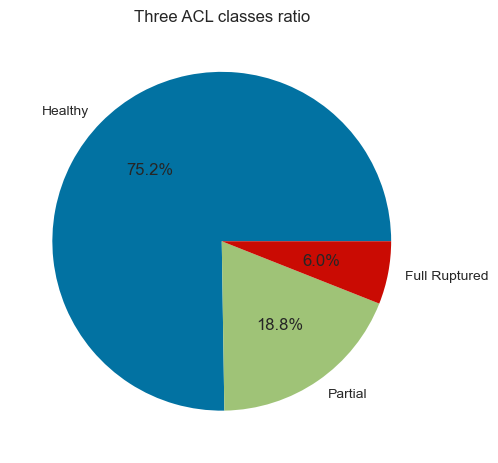

In [8]:
print(data.head())
print(data.info())
print(data.shape)
data=data.drop('volumeFilename',axis=1)
outcome_values = data['aclDiagnosis'].value_counts()
outcome_values.sort_index()
plt.pie(outcome_values.values, labels=['Healthy', 'Partial', "Full Ruptured"], autopct='%1.1f%%')
plt.title('Three ACL classes ratio')
plt.show()

In [9]:
# 3 datasets
H = data[(data['aclDiagnosis'] == 0)]
P = data[(data['aclDiagnosis'] == 1)]
R = data[(data['aclDiagnosis'] == 2)]

#------------COUNT-----------------------
def target_count():
    trace = go.Bar( x = data['aclDiagnosis'].value_counts().values.tolist(), 
                    y = ['Healthy','Partial', 'Ruptured' ], 
                    orientation = 'h', 
                    text=data['aclDiagnosis'].value_counts().values.tolist(), 
                    textfont=dict(size=15),
                    textposition = 'auto',
                    opacity = 0.8,marker=dict(
                    color=['lightskyblue', 'gold'],
                    line=dict(color='#000000',width=1.5)))

    layout = dict(title =  'Count of ACL tears')

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

In [10]:
#------------PERCENTAGE-------------------
def target_percent():
    trace = go.Pie(labels = ['Healthy','Partial', 'Ruptured' ], values = data['aclDiagnosis'].value_counts(), 
                   textfont=dict(size=15), opacity = 0.8,
                   marker=dict(colors=['lightskyblue', 'gold'], 
                               line=dict(color='#000000', width=1.5)))


    layout = dict(title =  'Distribution of ACL tears')

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

In [11]:
target_count()
target_percent()

In [12]:
#print(train.describe().T)
#plt.pie(outcome_values.values, labels=['Healthy', 'Partial', "Full Ruptured"], autopct='%1.1f%%')
#plt.title('Three ACL classes ratio')
#plt.show()

In [13]:
print ("#"*40,"\n","Features : \n\n", data.columns.tolist()) #get name of columns/features
print ("#"*40,"\nMissing values :\n\n", data.isnull().sum().sort_values(ascending=False))
print ("#"*40,"\nUnique values :  \n\n", data.nunique())  #  count of unique values

######################################## 
 Features : 

 ['examId', 'seriesNo', 'aclDiagnosis', 'kneeLR', 'roiX', 'roiY', 'roiZ', 'roiHeight', 'roiWidth', 'roiDepth']
######################################## 
Missing values :

 examId          0
seriesNo        0
aclDiagnosis    0
kneeLR          0
roiX            0
roiY            0
roiZ            0
roiHeight       0
roiWidth        0
roiDepth        0
dtype: int64
######################################## 
Unique values :  

 examId          909
seriesNo         11
aclDiagnosis      3
kneeLR            2
roiX             63
roiY             89
roiZ             11
roiHeight        58
roiWidth         59
roiDepth          5
dtype: int64


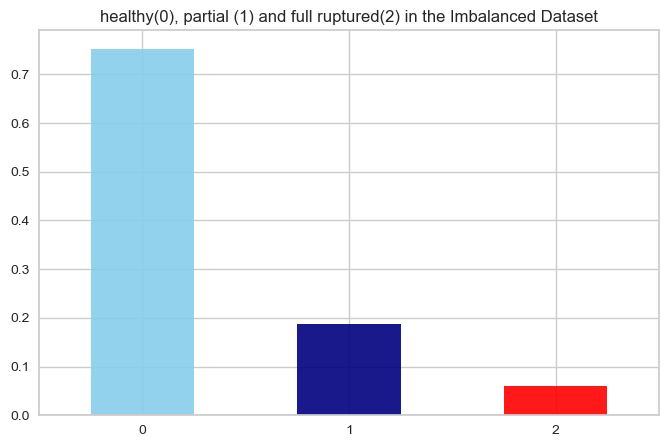

In [14]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,5))
data.aclDiagnosis.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy',"red"], alpha = 0.9, rot=0)
plt.title('healthy(0), partial (1) and full ruptured(2) in the Imbalanced Dataset')
plt.show()

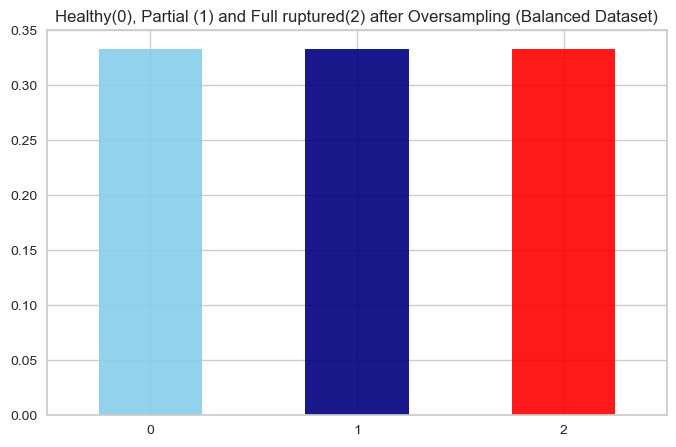

In [15]:
from sklearn.utils import resample

no = data[data.aclDiagnosis == 0]
yes1 = data[data.aclDiagnosis == 1]
yes2 = data[data.aclDiagnosis == 2]
yes_oversampled1 = resample(yes1, replace=True, n_samples=len(no), random_state=123)
yes_oversampled2 = resample(yes2, replace=True, n_samples=len(no), random_state=123)
oversampled = pd.concat([no, yes_oversampled1,yes_oversampled2 ])

fig = plt.figure(figsize = (8,5))
oversampled.aclDiagnosis.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy', "red"], alpha = 0.9, rot=0)
plt.title('Healthy(0), Partial (1) and Full ruptured(2) after Oversampling (Balanced Dataset)')
plt.show()

In [16]:
print ("#"*40,"\n","Features : \n\n", oversampled.columns.tolist()) #get name of columns/features
print ("#"*40,"\nMissing values :\n\n", oversampled.isnull().sum().sort_values(ascending=False))
print ("#"*40,"\nUnique values :  \n\n", oversampled.nunique())  #  count of unique values

######################################## 
 Features : 

 ['examId', 'seriesNo', 'aclDiagnosis', 'kneeLR', 'roiX', 'roiY', 'roiZ', 'roiHeight', 'roiWidth', 'roiDepth']
######################################## 
Missing values :

 examId          0
seriesNo        0
aclDiagnosis    0
kneeLR          0
roiX            0
roiY            0
roiZ            0
roiHeight       0
roiWidth        0
roiDepth        0
dtype: int64
######################################## 
Unique values :  

 examId          906
seriesNo         11
aclDiagnosis      3
kneeLR            2
roiX             63
roiY             89
roiZ             11
roiHeight        58
roiWidth         59
roiDepth          5
dtype: int64


In [17]:
oversampled.describe().T

,count,mean,std,min,25%,50%,75%,max
examId,2070.0,733019.185024,174809.437430,329637.0,576971.0,753060.0,879589.25,1028670.0
seriesNo,2070.0,5.367633,1.180073,3.0,5.0,5.0,5.00,20.0
aclDiagnosis,2070.0,1.000000,0.816694,0.0,0.0,1.0,2.00,2.0
kneeLR,2070.0,0.489372,0.500008,0.0,0.0,0.0,1.00,1.0
roiX,2070.0,112.924155,11.186176,71.0,105.0,113.0,121.00,146.0
roiY,2070.0,109.154106,16.072934,22.0,99.0,109.0,118.00,184.0
roiZ,2070.0,14.122705,1.509249,9.0,13.0,14.0,15.00,22.0
roiHeight,2070.0,92.244444,9.163577,62.0,86.0,92.0,99.00,124.0
roiWidth,2070.0,93.556039,10.603924,61.0,86.0,93.0,100.00,136.0
roiDepth,2070.0,3.355556,0.774881,2.0,3.0,3.0,4.00,6.0


In [18]:
# 3 datasets
H = oversampled[(oversampled['aclDiagnosis'] == 0)]
P = oversampled[(oversampled['aclDiagnosis'] == 1)]
R = oversampled[(oversampled['aclDiagnosis'] == 2)]

#------------COUNT-----------------------
def target_count():
    trace = go.Bar( x = oversampled['aclDiagnosis'].value_counts().values.tolist(), 
                    y = ['Healthy','Partial', 'Ruptured' ], 
                    orientation = 'h', 
                    text=oversampled['aclDiagnosis'].value_counts().values.tolist(), 
                    textfont=dict(size=15),
                    textposition = 'auto',
                    opacity = 0.8,marker=dict(
                    color=['lightskyblue', 'gold'],
                    line=dict(color='#000000',width=1.5)))

    layout = dict(title =  'Count of ACL tears')

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

In [19]:
#------------PERCENTAGE-------------------
def target_percent():
    trace = go.Pie(labels = ['Healthy','Partial', 'Ruptured' ], values = oversampled['aclDiagnosis'].value_counts(), 
                   textfont=dict(size=15), opacity = 0.8,
                   marker=dict(colors=['lightskyblue', 'gold'], 
                               line=dict(color='#000000', width=1.5)))


    layout = dict(title =  'Distribution of ACL tears')

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

In [20]:
target_count()
target_percent()

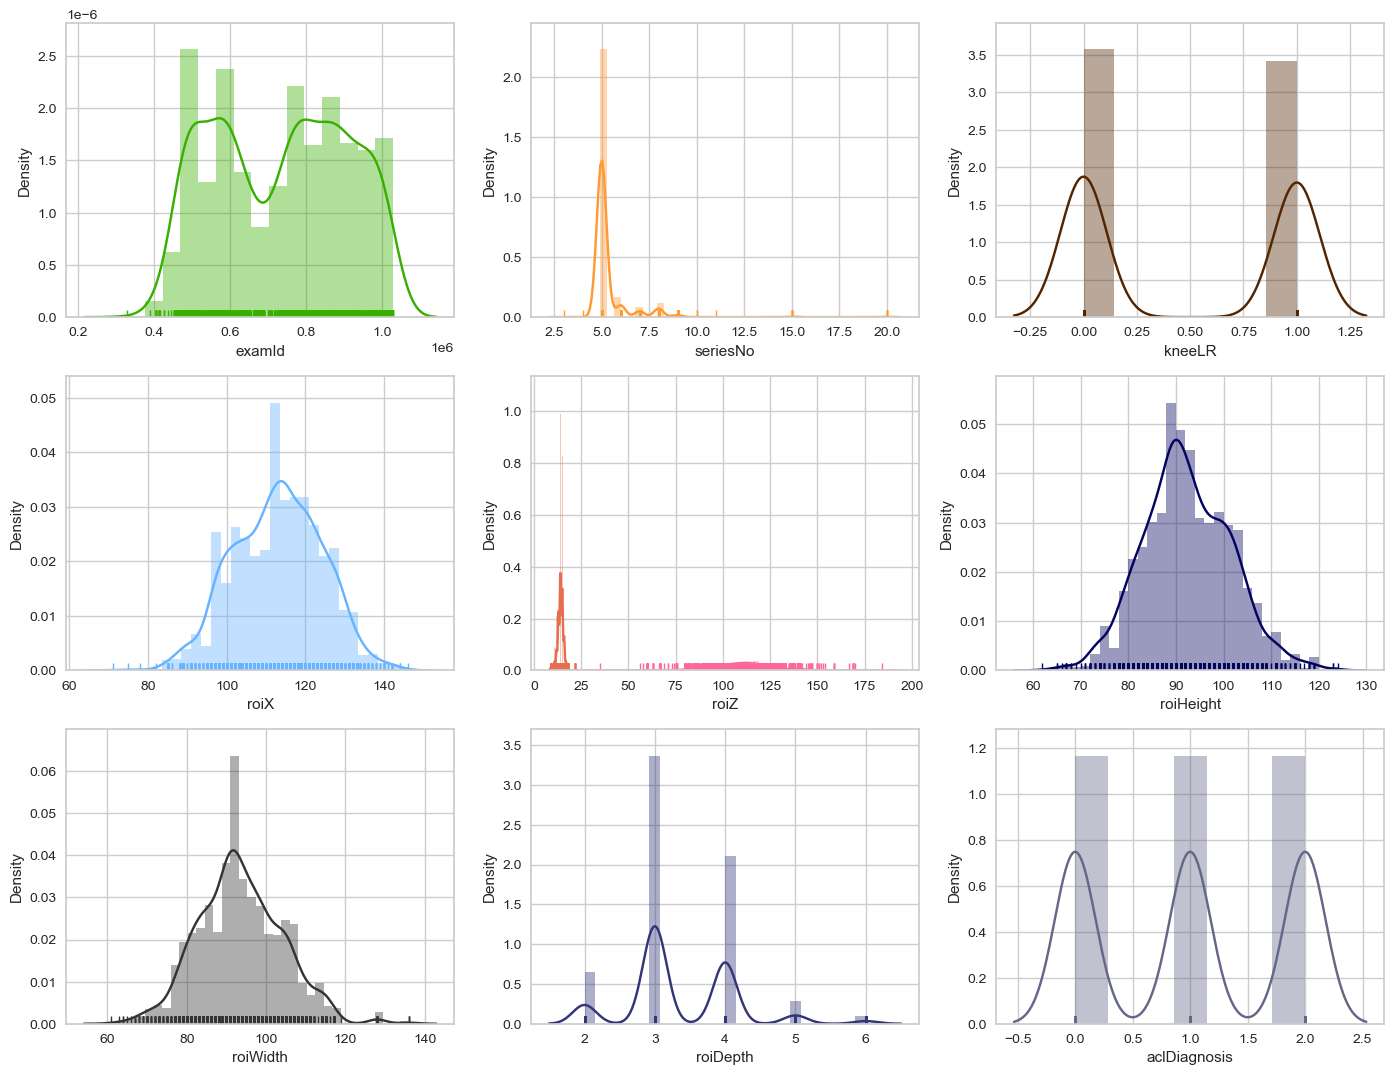

In [21]:
fig, axs = plt.subplots(3, 3, figsize=(17,13))
axs = axs.flatten()
sns.distplot(oversampled['examId'],rug=True,color='#38b000',ax=axs[0])
sns.distplot(oversampled['seriesNo'],rug=True,color='#FF9933',ax=axs[1])
sns.distplot(oversampled['kneeLR'],rug=True,color='#522500',ax=axs[2])
sns.distplot(oversampled['roiX'],rug=True,color='#66b3ff',ax=axs[3])
sns.distplot(oversampled['roiY'],rug=True,color='#FF6699',ax=axs[4])
sns.distplot(oversampled['roiZ'],rug=True,color='#e76f51',ax=axs[4])
sns.distplot(oversampled['roiHeight'],rug=True,color='#03045e',ax=axs[5])
sns.distplot(oversampled['roiWidth'],rug=True,color='#333533',ax=axs[6])
sns.distplot(oversampled['roiDepth'],rug=True,color='#333578',ax=axs[7])
sns.distplot(oversampled['aclDiagnosis'],rug=True,color='#666788',ax=axs[8])
plt.show()

In [22]:
def dist_box(oversampled):
 # function plots a combined graph for univariate analysis of continous variable 
 #to check spread, central tendency , dispersion and outliers  
    Name=oversampled.name.upper()
    fig,(ax_box,ax_dis)  =plt.subplots(nrows=2,sharex=True,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))
    mean=oversampled.mean()
    median=oversampled.median()
    mode=oversampled.mode().tolist()[0]
    sns.set_theme(style="white")
    sns.set_palette(sns.color_palette("Set1", 8))
    fig.suptitle("SPREAD OF DATA FOR "+ Name  , fontsize=18, fontweight='bold')
    sns.boxplot(x=oversampled,showmeans=True, orient='h',ax=ax_box)
    ax_box.set(xlabel='')
     # just trying to make visualisation better. This will set background to white
    sns.despine(top=True,right=True,left=True) # to remove side line from graph
    sns.set_palette(sns.color_palette("Set1", 8))
    sns.distplot(oversampled,kde=False,ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})

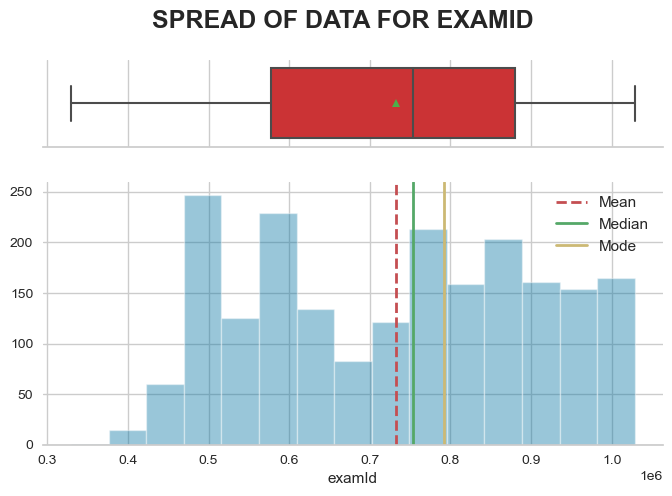

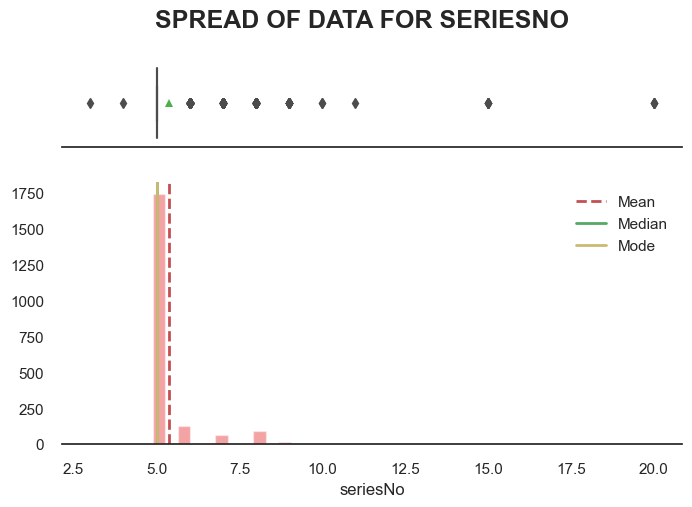

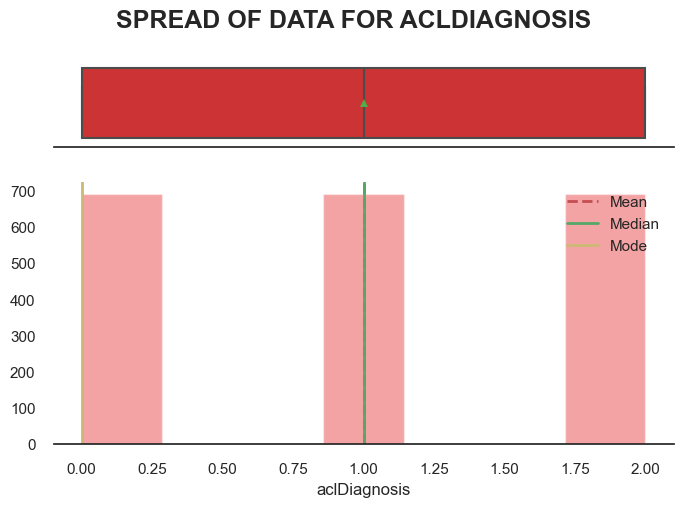

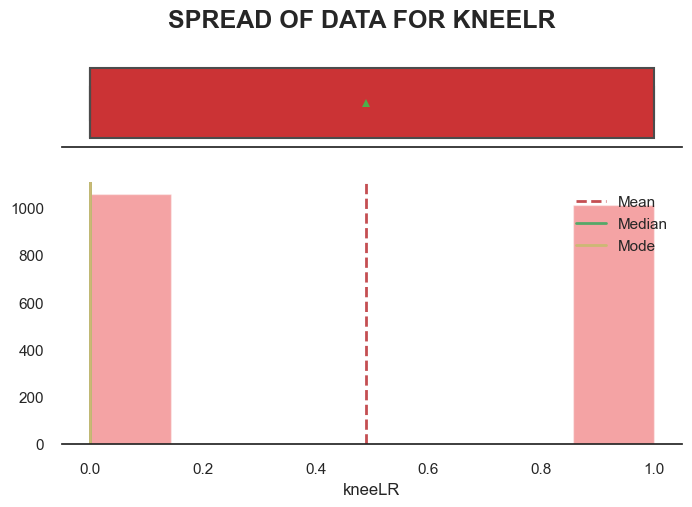

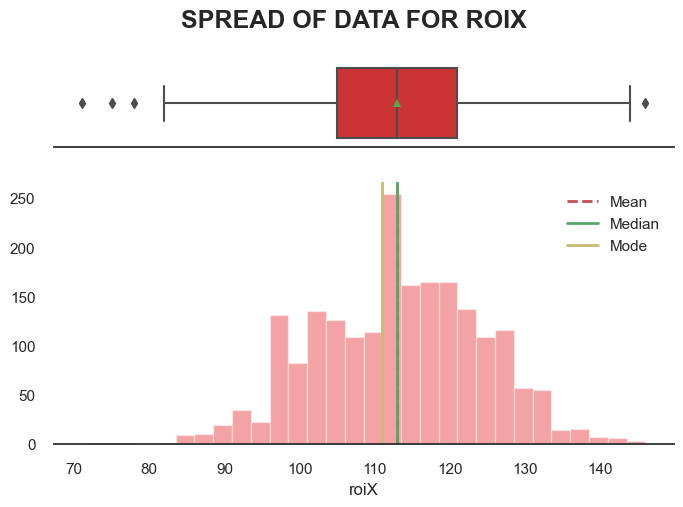

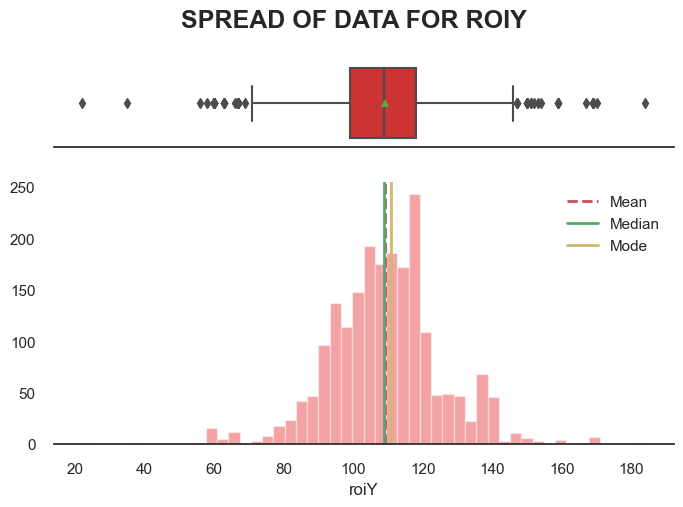

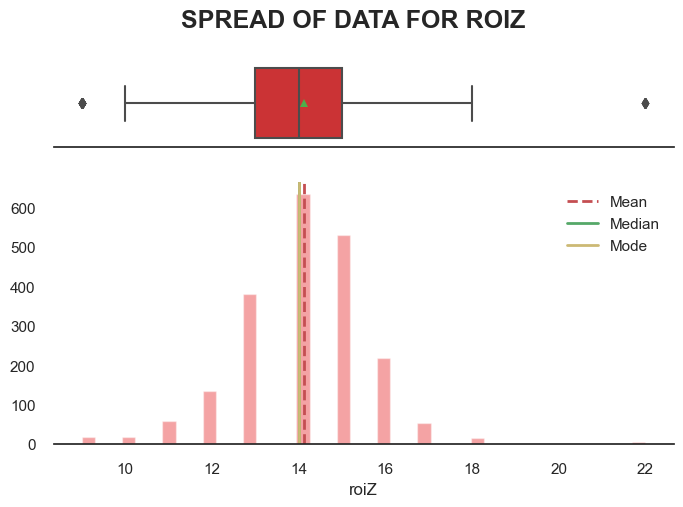

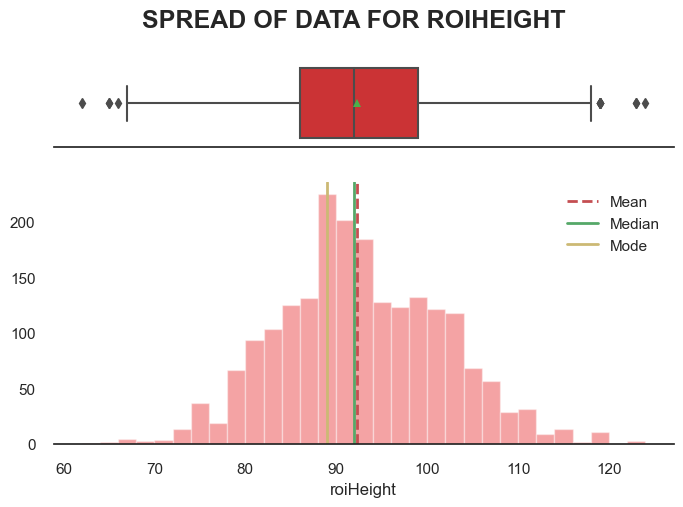

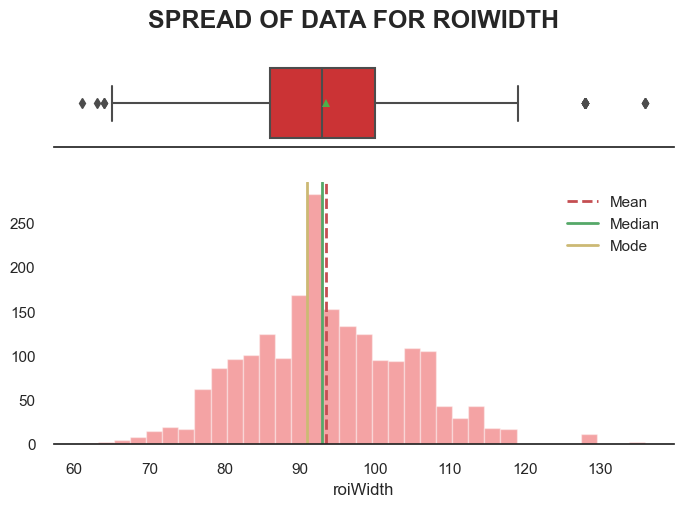

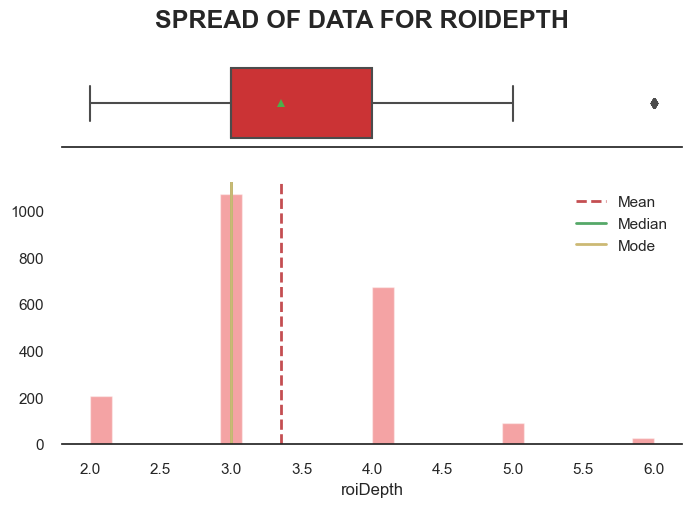

In [23]:
#select all quantitative columns for checking the spread
list_col= oversampled.select_dtypes(include='number').columns.to_list()
for i in range(len(list_col)):
    dist_box(oversampled[list_col[i]])

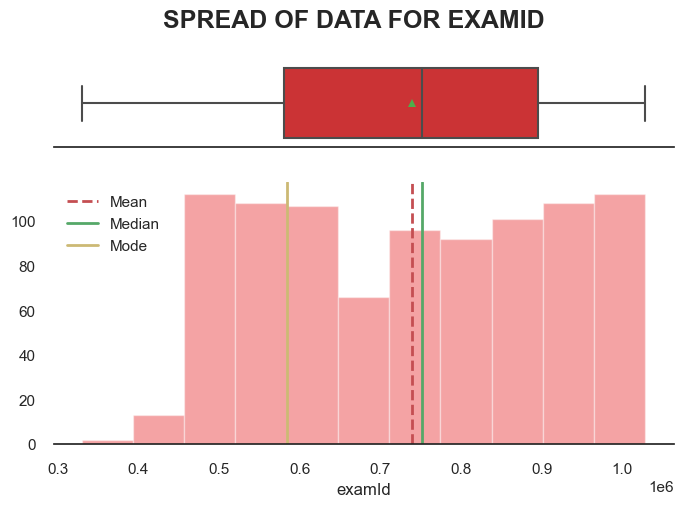

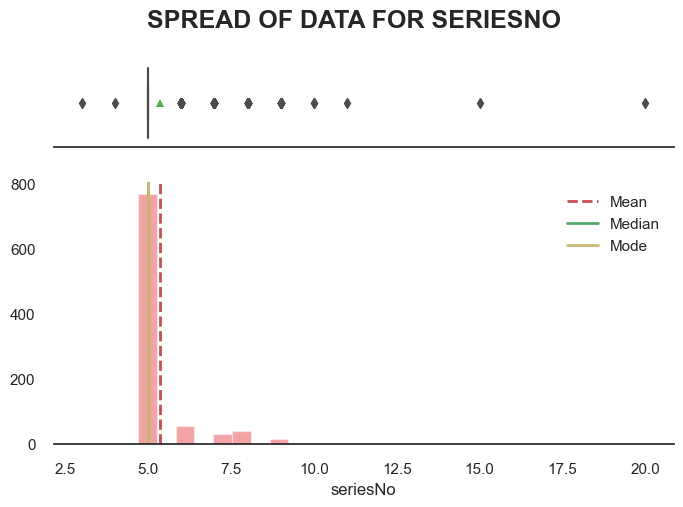

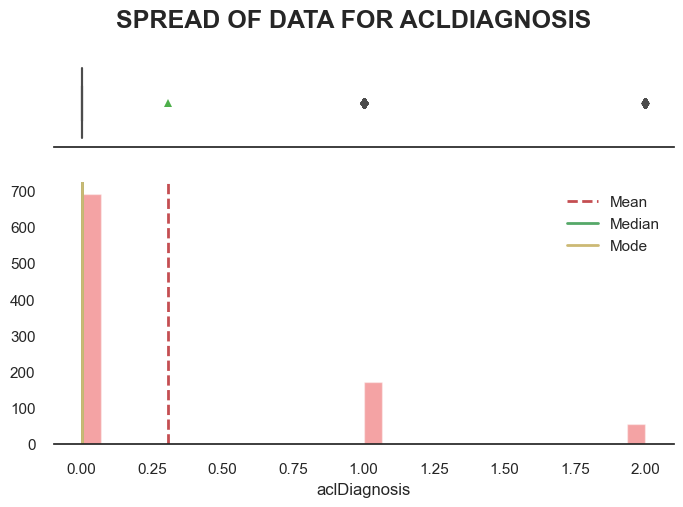

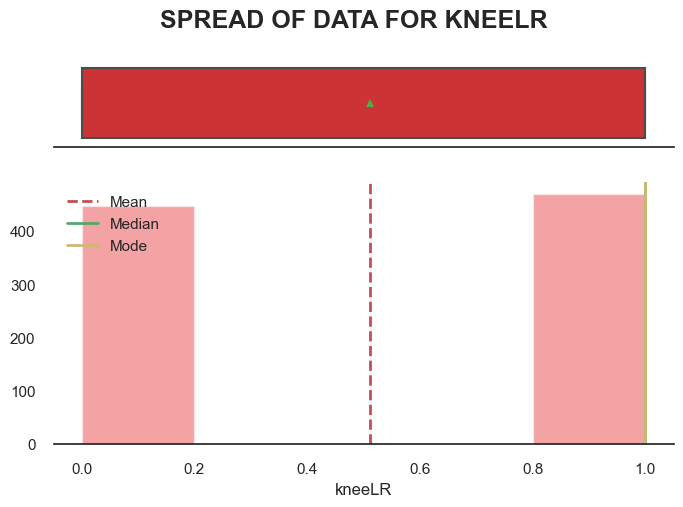

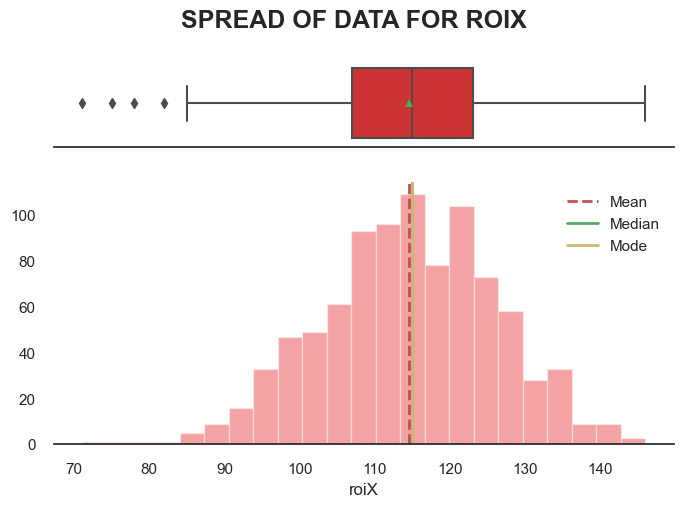

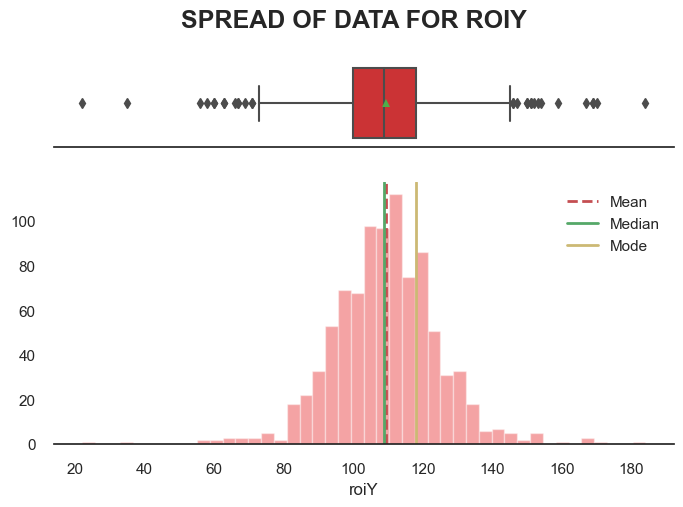

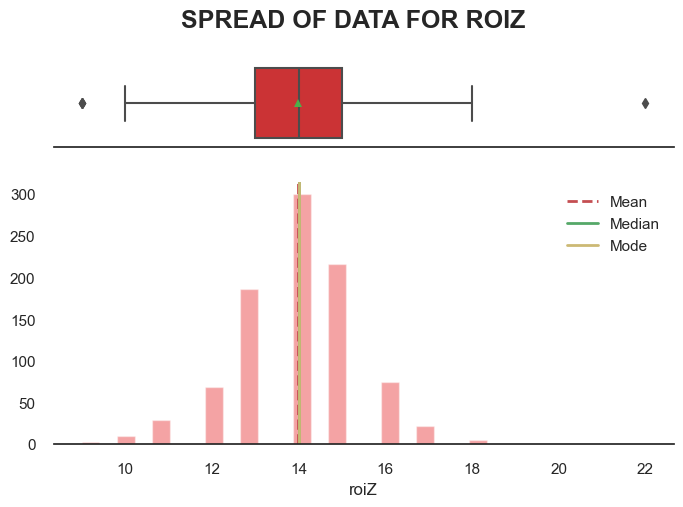

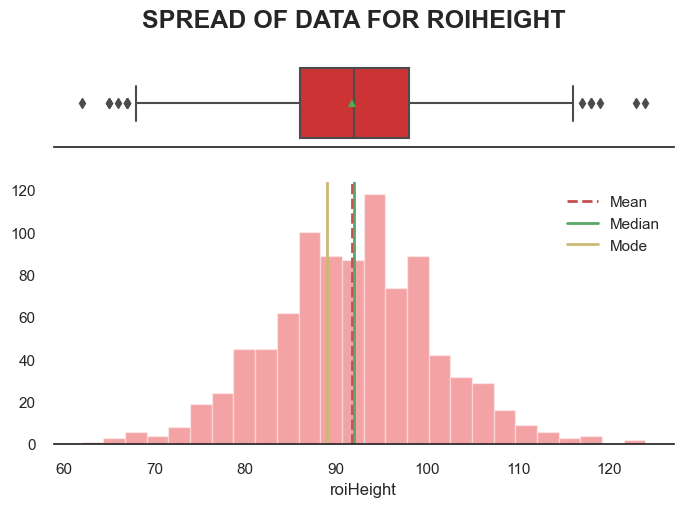

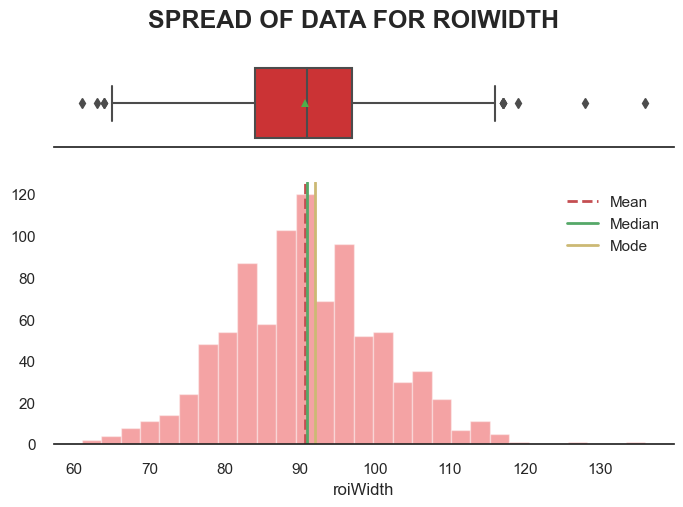

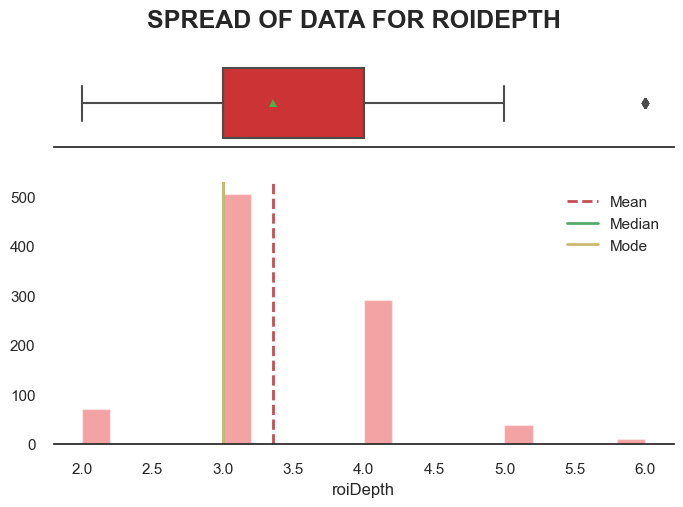

In [24]:
#select all quantitative columns for checking the spread
list_col= data.select_dtypes(include='number').columns.to_list()
for i in range(len(list_col)):
    dist_box(data[list_col[i]])

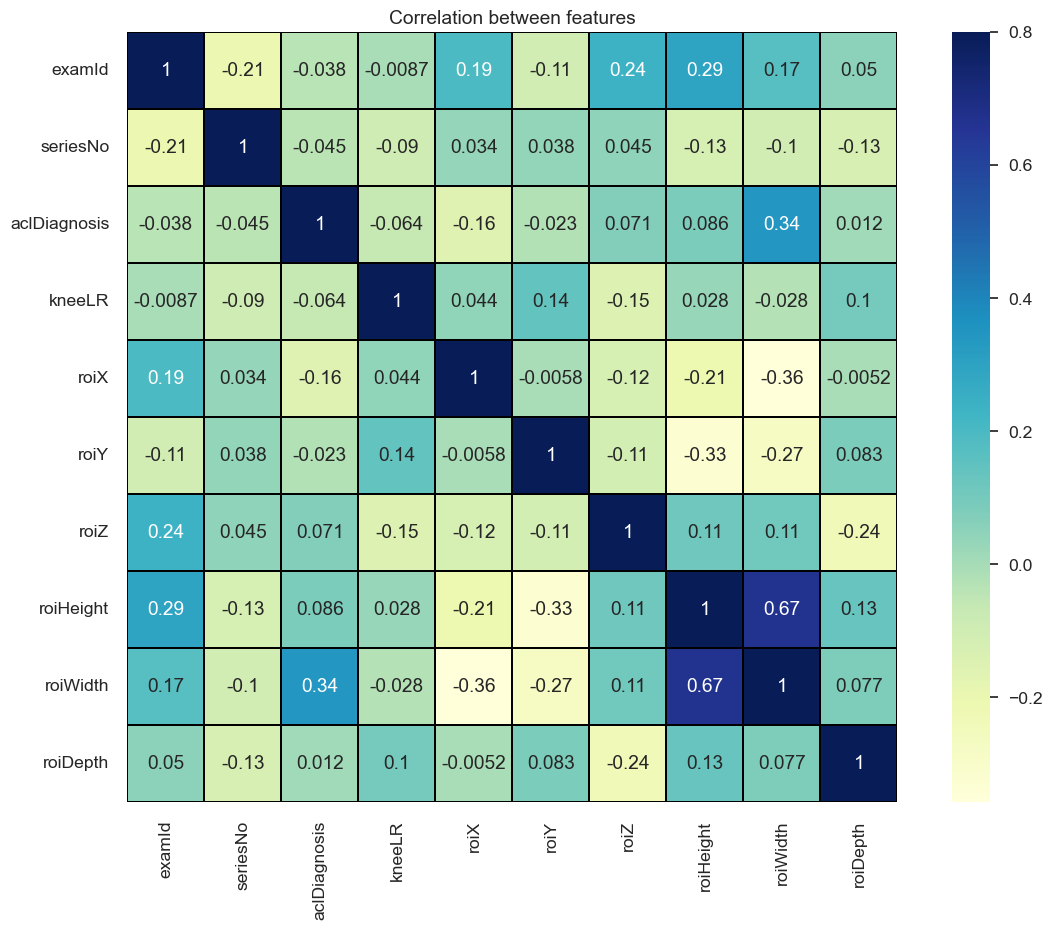

In [25]:
corr=oversampled.corr()

sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="black")
plt.title('Correlation between features');


In [26]:
oversampled.corr()

,examId,seriesNo,aclDiagnosis,kneeLR,roiX,roiY,roiZ,roiHeight,roiWidth,roiDepth
examId,1.000000,-0.206154,-0.037699,-0.008744,0.194875,-0.107651,0.239084,0.293853,0.169525,0.050407
seriesNo,-0.206154,1.000000,-0.045135,-0.090442,0.033565,0.037681,0.045217,-0.125194,-0.104987,-0.127689
aclDiagnosis,-0.037699,-0.045135,1.000000,-0.063914,-0.155012,-0.023381,0.070582,0.085701,0.339940,0.012220
kneeLR,-0.008744,-0.090442,-0.063914,1.000000,0.044229,0.144391,-0.146861,0.027994,-0.027645,0.100823
roiX,0.194875,0.033565,-0.155012,0.044229,1.000000,-0.005760,-0.123868,-0.211410,-0.357073,-0.005196
roiY,-0.107651,0.037681,-0.023381,0.144391,-0.005760,1.000000,-0.109786,-0.327358,-0.273510,0.083147
roiZ,0.239084,0.045217,0.070582,-0.146861,-0.123868,-0.109786,1.000000,0.114904,0.111613,-0.236938
roiHeight,0.293853,-0.125194,0.085701,0.027994,-0.211410,-0.327358,0.114904,1.000000,0.668592,0.134371
roiWidth,0.169525,-0.104987,0.339940,-0.027645,-0.357073,-0.273510,0.111613,0.668592,1.000000,0.077395
roiDepth,0.050407,-0.127689,0.012220,0.100823,-0.005196,0.083147,-0.236938,0.134371,0.077395,1.000000


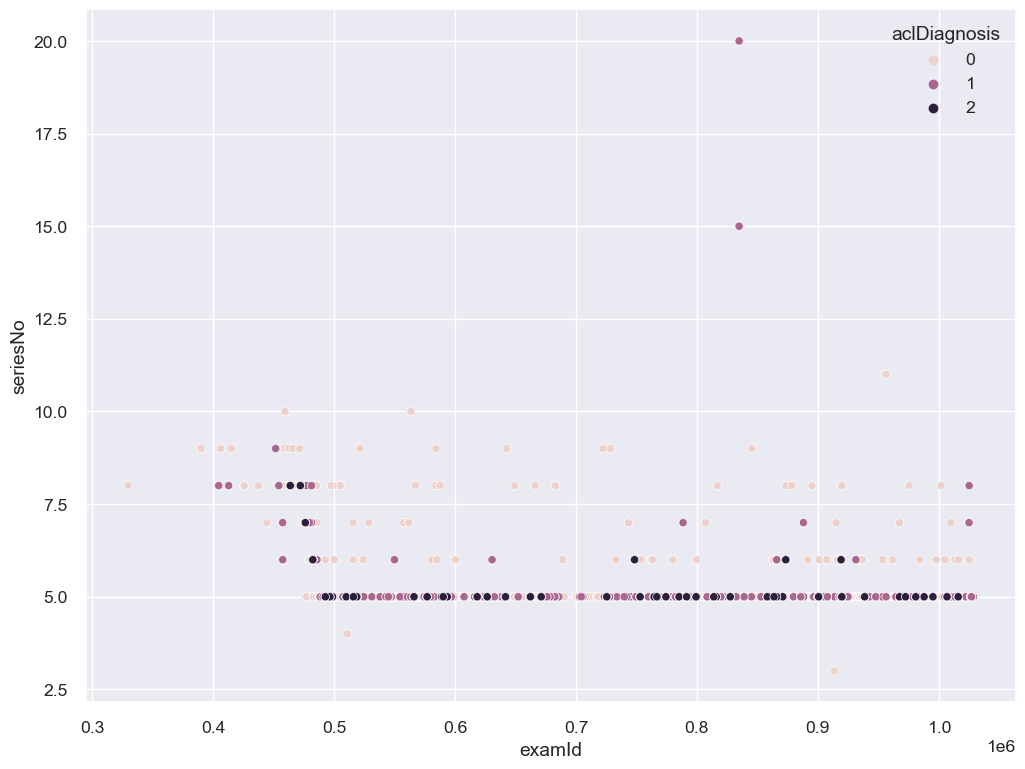

In [27]:
plt.figure(figsize=(12,9))
sns.scatterplot(data=oversampled, x = 'examId', y='seriesNo', hue = 'aclDiagnosis')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

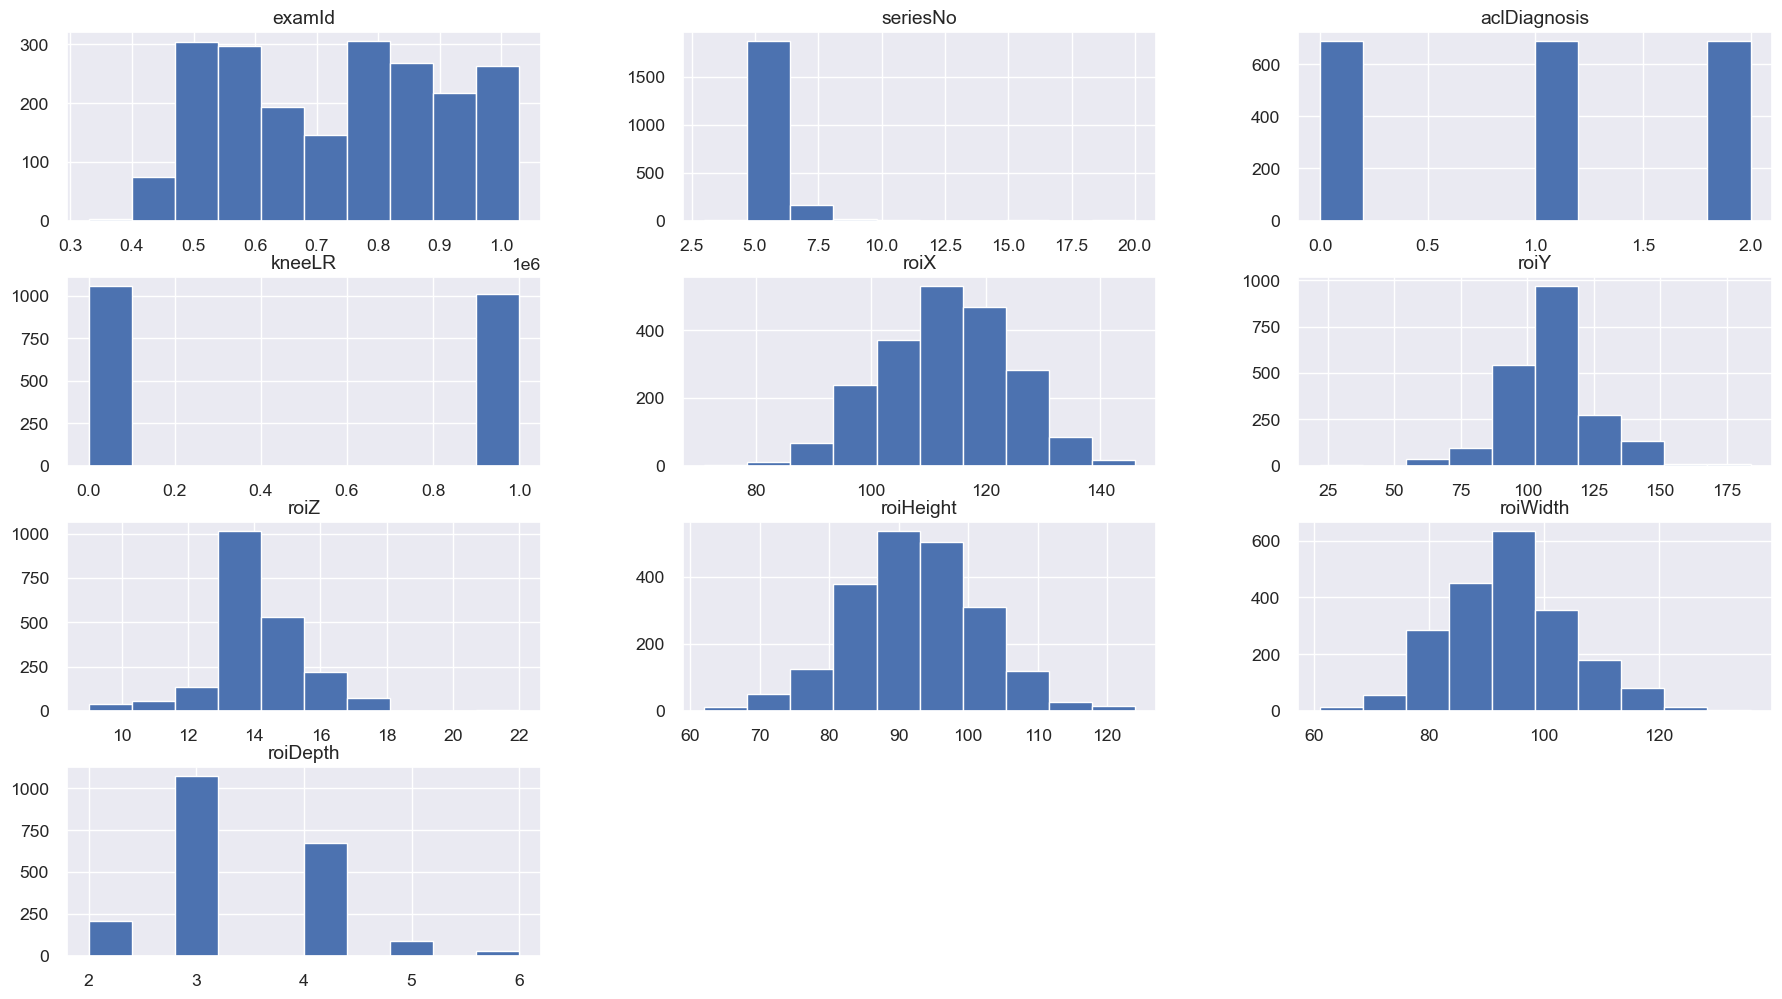

In [28]:
oversampled.hist(figsize=(22,12))
plt.show

<AxesSubplot:xlabel='seriesNo', ylabel='count'>

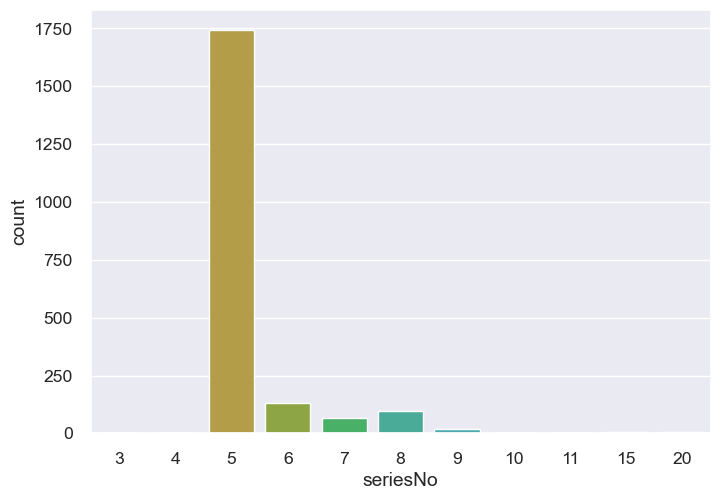

In [29]:
 sns.countplot(x=oversampled['seriesNo'] )

<AxesSubplot:xlabel='seriesNo', ylabel='count'>

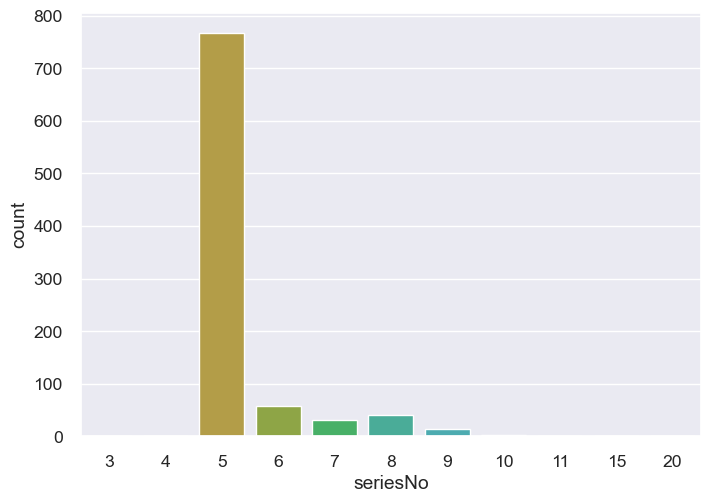

In [30]:
sns.countplot(x=data['seriesNo'])

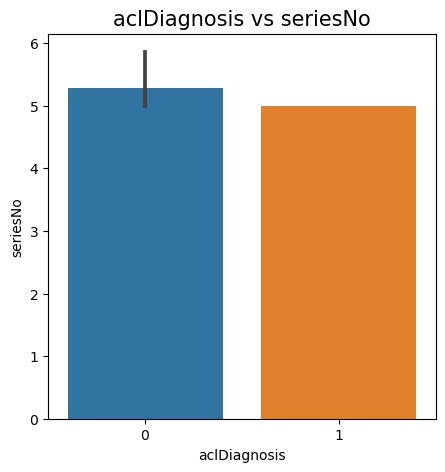

In [31]:
plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(x="aclDiagnosis", y="seriesNo", data=data[170:180])
plt.title("aclDiagnosis vs seriesNo",fontsize=15)
plt.xlabel("aclDiagnosis")
plt.ylabel("seriesNo")
plt.show()


In [32]:
oversampled

,examId,seriesNo,aclDiagnosis,kneeLR,roiX,roiY,roiZ,roiHeight,roiWidth,roiDepth
0,329637,8,0,1,139,184,14,74,72,3
1,390116,9,0,0,113,105,10,83,98,6
3,406320,9,0,0,117,124,12,91,80,3
4,412857,8,0,1,122,105,14,83,98,4
6,415102,9,0,0,116,117,11,67,68,2
...,...,...,...,...,...,...,...,...,...,...
535,791491,5,2,0,132,106,13,89,92,4
812,972492,5,2,0,107,80,16,106,104,2
121,516014,5,2,0,91,120,16,81,94,3
249,590262,5,2,0,119,111,14,83,95,3


In [33]:

#train_test_splitting of the dataset

x = oversampled.drop(columns = ['aclDiagnosis','kneeLR','seriesNo'] )

# Getting Predicting Value
y = oversampled['aclDiagnosis']

#from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [34]:

print(x_train.shape, x_test.shape)

(1552, 7) (518, 7)


In [35]:

y.value_counts()

0    690
1    690
2    690
Name: aclDiagnosis, dtype: int64

In [36]:
y_test.value_counts()

0    178
1    170
2    170
Name: aclDiagnosis, dtype: int64

In [37]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

1552
518
1552
518


In [38]:
 #Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train,y_train)

LogisticRegression()

In [40]:
y_pred=reg.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",reg.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))


Classification Report is:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       178
           1       0.33      1.00      0.49       170
           2       0.00      0.00      0.00       170

    accuracy                           0.33       518
   macro avg       0.11      0.33      0.16       518
weighted avg       0.11      0.33      0.16       518

Confusion Matrix:
 [[  0 178   0]
 [  0 170   0]
 [  0 170   0]]
Training Score:
 33.50515463917525
Mean Squared Error:
 0.6718146718146718
R2 score is:
 -0.00035516093229781553


In [41]:
LRacc=(accuracy_score(y_test,y_pred)*100)

In [42]:

print(LRacc)

32.818532818532816


Text(0.5, 23.52222222222222, 'Predicted label')

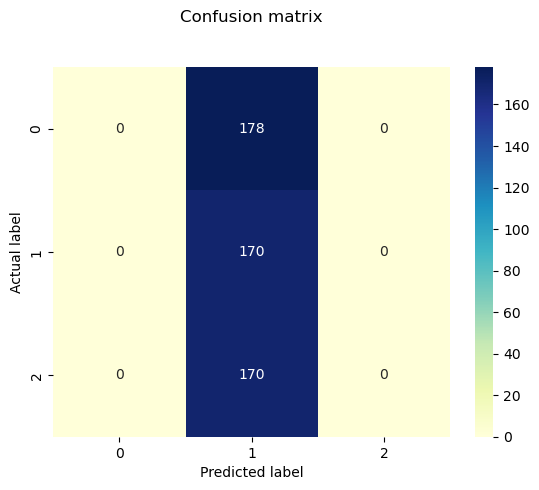

In [43]:
ypred = reg.predict(x_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [44]:

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)

knn.fit(x_train,y_train)

KNeighborsClassifier()

In [45]:



y_pred=knn.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",knn.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.75      0.48      0.58       178
           1       0.67      0.79      0.73       170
           2       0.83      1.00      0.90       170

    accuracy                           0.75       518
   macro avg       0.75      0.76      0.74       518
weighted avg       0.75      0.75      0.74       518

Confusion Matrix:
 [[ 85  65  28]
 [ 28 134   8]
 [  0   0 170]]
Training Score:
 82.73195876288659
Mean Squared Error:
 0.4111969111969112
R2 score is:
 0.3877136514983349


In [46]:
knnacc=(accuracy_score(y_test,y_pred)*100)

In [47]:
print(knnacc)

75.0965250965251


Text(0.5, 23.52222222222222, 'Predicted label')

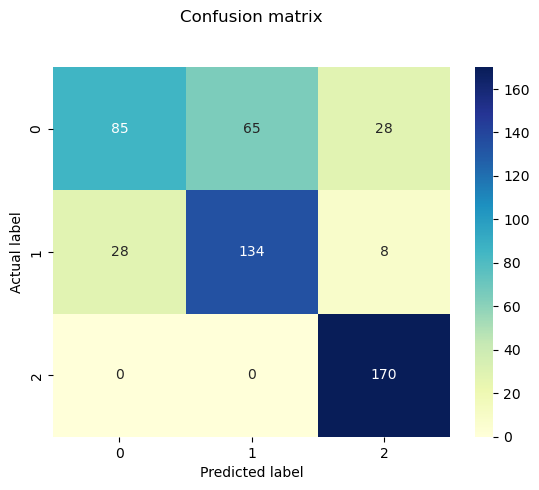

In [48]:
ypred = knn.predict(x_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [49]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [50]:
y_pred=svc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",svc.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       178
           1       0.32      0.53      0.40       170
           2       0.32      0.44      0.37       170

    accuracy                           0.32       518
   macro avg       0.21      0.32      0.26       518
weighted avg       0.21      0.32      0.25       518

Confusion Matrix:
 [[  0 100  78]
 [  0  90  80]
 [  0  95  75]]
Training Score:
 35.180412371134025
Mean Squared Error:
 1.1332046332046333
R2 score is:
 -0.687380688124307


In [51]:
svcacc=(accuracy_score(y_test,y_pred)*100)

In [52]:
print(svcacc)

31.85328185328185


Text(0.5, 23.52222222222222, 'Predicted label')

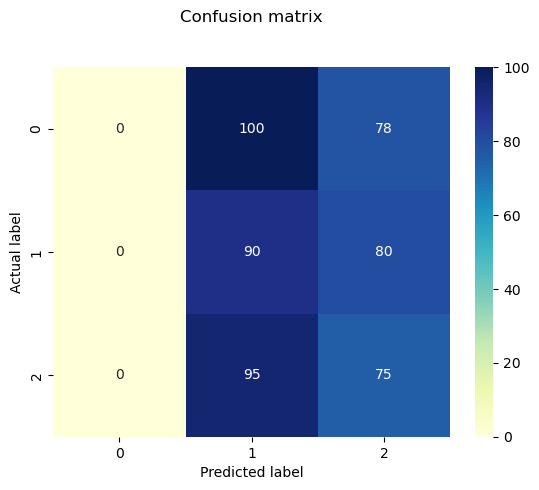

In [53]:


ypred = svc.predict(x_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [54]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)


GaussianNB()

In [55]:
y_pred=gnb.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",gnb.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.47      0.57      0.52       178
           1       0.30      0.21      0.25       170
           2       0.44      0.48      0.46       170

    accuracy                           0.42       518
   macro avg       0.40      0.42      0.41       518
weighted avg       0.40      0.42      0.41       518

Confusion Matrix:
 [[102  33  43]
 [ 74  35  61]
 [ 42  47  81]]
Training Score:
 42.71907216494845
Mean Squared Error:
 1.0714285714285714
R2 score is:
 -0.595394006659268


In [56]:


gnbacc=(accuracy_score(y_test,y_pred)*100)

In [57]:



print(gnbacc)

42.084942084942085


Text(0.5, 23.52222222222222, 'Predicted label')

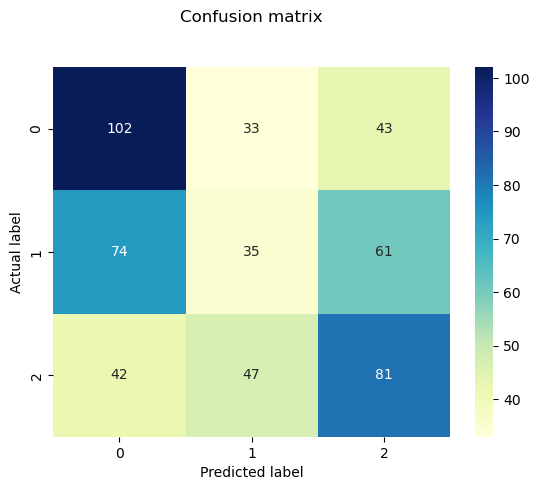

In [58]:
ypred = gnb.predict(x_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [59]:

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=10, random_state=123,criterion='entropy')

dtree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=123)

In [60]:


y_pred=dtree.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",dtree.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.75      0.56      0.64       178
           1       0.69      0.81      0.74       170
           2       0.82      0.90      0.86       170

    accuracy                           0.75       518
   macro avg       0.75      0.75      0.75       518
weighted avg       0.75      0.75      0.74       518

Confusion Matrix:
 [[ 99  59  20]
 [ 19 137  14]
 [ 14   3 153]]
Training Score:
 86.79123711340206
Mean Squared Error:
 0.44594594594594594
R2 score is:
 0.3359711431742506


In [61]:

dtacc=(accuracy_score(y_test,y_pred)*100)



In [62]:

print(dtacc)

75.0965250965251


Text(0.5, 23.52222222222222, 'Predicted label')

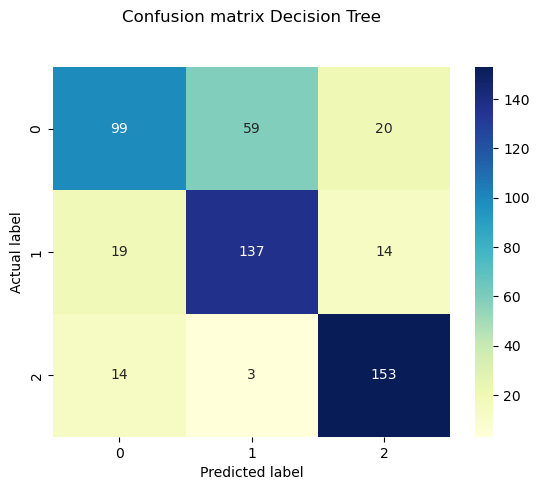

In [63]:
ypred = dtree.predict(x_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix Decision Tree', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [64]:
pd.DataFrame(dtree.feature_importances_,
             index=x_train.columns, columns=['Importance']).sort_values(
    by='Importance', ascending=False)[:10]

,Importance
roiWidth,0.229520
roiY,0.212974
examId,0.173641
roiHeight,0.146951
roiX,0.129745
roiZ,0.085511
roiDepth,0.021659


In [65]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier( random_state=17)
#rfc=RandomForestClassifier( n_estimators=100, random_state=17, n_jobs=4)
rfc.fit(x_train,y_train)


RandomForestClassifier(random_state=17)

In [66]:

y_pred=rfc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",rfc.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))


Classification Report is:
               precision    recall  f1-score   support

           0       0.98      0.89      0.93       178
           1       0.91      0.98      0.94       170
           2       0.98      1.00      0.99       170

    accuracy                           0.96       518
   macro avg       0.96      0.96      0.96       518
weighted avg       0.96      0.96      0.96       518

Confusion Matrix:
 [[158  17   3]
 [  3 167   0]
 [  0   0 170]]
Training Score:
 100.0
Mean Squared Error:
 0.06177606177606178
R2 score is:
 0.9080133185349611


In [67]:


rfacc=(accuracy_score(y_test,y_pred)*100)

In [68]:
print(rfacc)

95.55984555984556


Text(0.5, 23.52222222222222, 'Predicted label')

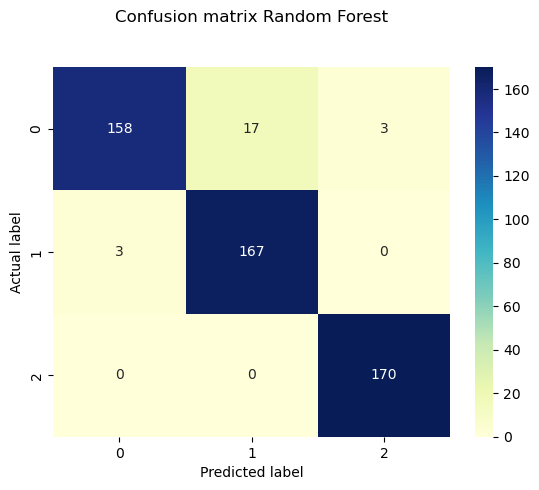

In [69]:

ypred = rfc.predict(x_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix Random Forest', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [70]:
pd.DataFrame(rfc.feature_importances_,
             index=x_train.columns, columns=['Importance']).sort_values(
    by='Importance', ascending=False)[:10]

,Importance
examId,0.192899
roiWidth,0.187663
roiY,0.175824
roiX,0.163178
roiHeight,0.148647
roiZ,0.081179
roiDepth,0.050609


In [71]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier()
adb.fit(x_train,y_train)

AdaBoostClassifier()

In [72]:

y_pred=adb.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",adb.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))


Classification Report is:
               precision    recall  f1-score   support

           0       0.51      0.63      0.56       178
           1       0.51      0.43      0.46       170
           2       0.74      0.68      0.71       170

    accuracy                           0.58       518
   macro avg       0.59      0.58      0.58       518
weighted avg       0.59      0.58      0.58       518

Confusion Matrix:
 [[112  44  22]
 [ 79  73  18]
 [ 28  27 115]]
Training Score:
 61.5979381443299
Mean Squared Error:
 0.7104247104247104
R2 score is:
 -0.057846836847947225


In [73]:

adabacc=(accuracy_score(y_test,y_pred)*100)
print(adabacc)

57.91505791505791


Text(0.5, 23.52222222222222, 'Predicted label')

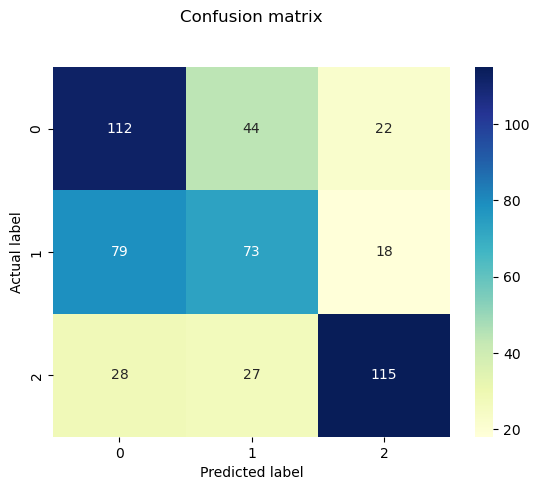

In [74]:

ypred = adb.predict(x_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [75]:



from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
#gbc=GradientBoostingClassifier(n_estimators=20, learning_rate = 0.1, max_features=2, max_depth = 2, random_state = 0)
gbc.fit(x_train,y_train)


GradientBoostingClassifier()

In [76]:
y_pred=gbc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",gbc.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.81      0.70      0.75       178
           1       0.79      0.84      0.81       170
           2       0.88      0.94      0.91       170

    accuracy                           0.83       518
   macro avg       0.83      0.83      0.82       518
weighted avg       0.83      0.83      0.82       518

Confusion Matrix:
 [[125  39  14]
 [ 20 143   7]
 [ 10   0 160]]
Training Score:
 90.65721649484536
Mean Squared Error:
 0.3127413127413127
R2 score is:
 0.5343174250832406


In [77]:
gbcacc=(accuracy_score(y_test,y_pred)*100)
print(gbcacc)

82.62548262548263


Text(0.5, 23.52222222222222, 'Predicted label')

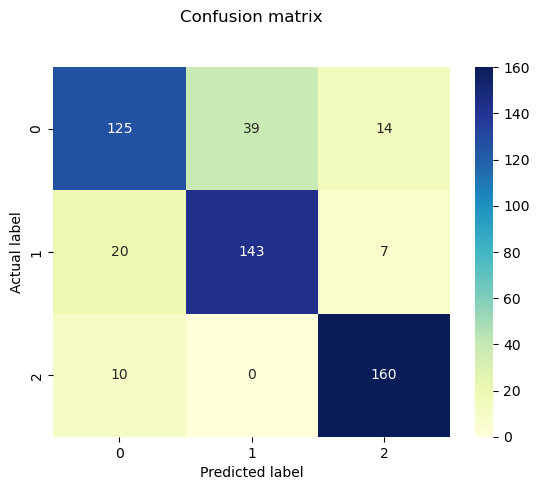

In [78]:
ypred = gbc.predict(x_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [79]:

from xgboost import XGBClassifier

#xgb =XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 10)
xgb =XGBClassifier()
xgb.fit(x_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [80]:

y_pred=xgb.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",xgb.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.99      0.83      0.90       178
           1       0.88      0.99      0.93       170
           2       0.96      1.00      0.98       170

    accuracy                           0.94       518
   macro avg       0.94      0.94      0.94       518
weighted avg       0.94      0.94      0.94       518

Confusion Matrix:
 [[147  24   7]
 [  2 168   0]
 [  0   0 170]]
Training Score:
 100.0
Mean Squared Error:
 0.10424710424710425
R2 score is:
 0.8447724750277469


In [81]:
xbgacc=(accuracy_score(y_test,y_pred)*100)
print(xbgacc)

93.62934362934364


Text(0.5, 23.52222222222222, 'Predicted label')

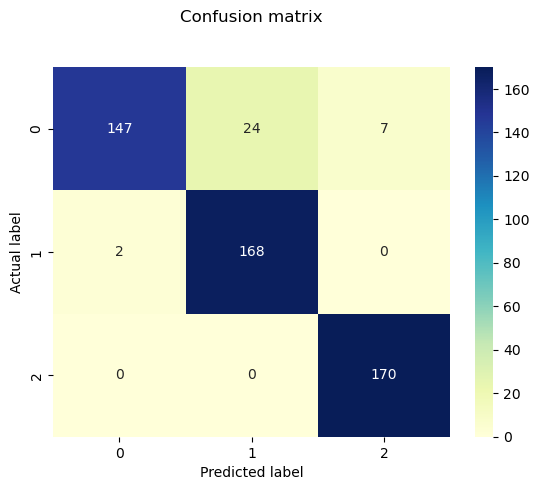

In [82]:

ypred = xgb.predict(x_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [83]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=100, criterion='entropy', min_samples_split=4,random_state=0)
etc.fit(x_train,y_train)

ExtraTreesClassifier(criterion='entropy', min_samples_split=4, random_state=0)

In [84]:
y_pred=etc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",etc.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96       178
           1       0.94      0.97      0.96       170
           2       0.99      1.00      0.99       170

    accuracy                           0.97       518
   macro avg       0.97      0.97      0.97       518
weighted avg       0.97      0.97      0.97       518

Confusion Matrix:
 [[167  10   1]
 [  4 165   1]
 [  0   0 170]]
Training Score:
 100.0
Mean Squared Error:
 0.03667953667953668
R2 score is:
 0.9453829078801331


In [85]:


etcacc=(accuracy_score(y_test,y_pred)*100)
print(etcacc)

96.91119691119691


Text(0.5, 23.52222222222222, 'Predicted label')

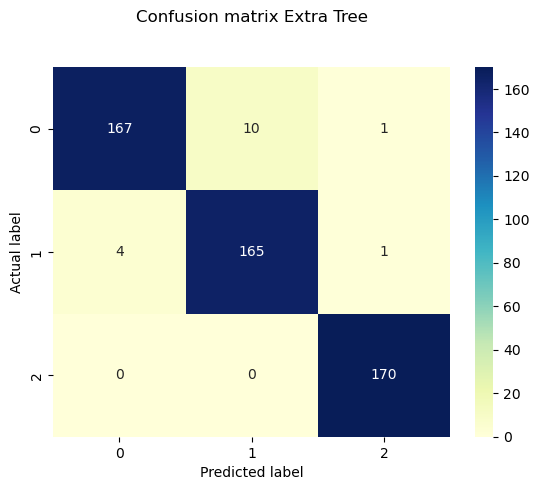

In [86]:
ypred = etc.predict(x_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix Extra Tree', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [87]:
feature_importance=pd.DataFrame(etc.feature_importances_,
             index=x_train.columns, columns=['Importance']).sort_values(
    by='Importance', ascending=False)[:10]

In [88]:
feature_importance

,Importance
roiWidth,0.184972
examId,0.156838
roiY,0.155496
roiX,0.154297
roiHeight,0.145073
roiZ,0.119572
roiDepth,0.083753


In [89]:
x_train.shape

(1552, 7)

In [90]:
conda install catoost


Note: you may need to restart the kernel to use updated packages.


Traceback (most recent call last):
  File "D:\anaconda\Scripts\conda-script.py", line 11, in <module>
    from conda.cli import main
ModuleNotFoundError: No module named 'conda'


In [91]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier

In [92]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(iterations=200,
                             learning_rate=0.5,
                             depth=10,
                             random_seed = 42,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 50,
                             od_wait=20)
cat.fit(x_train,y_train)

0:	learn: 0.9067008	total: 162ms	remaining: 32.2s
50:	learn: 0.0854244	total: 1.26s	remaining: 3.69s
100:	learn: 0.0349438	total: 2.38s	remaining: 2.33s
150:	learn: 0.0212854	total: 3.44s	remaining: 1.12s
199:	learn: 0.0155904	total: 4.49s	remaining: 0us


In [93]:
y_pred=cat.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",etc.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.97      0.83      0.89       178
           1       0.86      0.98      0.91       170
           2       0.98      1.00      0.99       170

    accuracy                           0.93       518
   macro avg       0.94      0.93      0.93       518
weighted avg       0.94      0.93      0.93       518

Confusion Matrix:
 [[147  28   3]
 [  4 166   0]
 [  0   0 170]]
Training Score:
 100.0
Mean Squared Error:
 0.08494208494208494
R2 score is:
 0.8735183129855715


In [94]:
catacc=(accuracy_score(y_test,y_pred)*100)
print(catacc)

93.24324324324324


Text(0.5, 23.52222222222222, 'Predicted label')

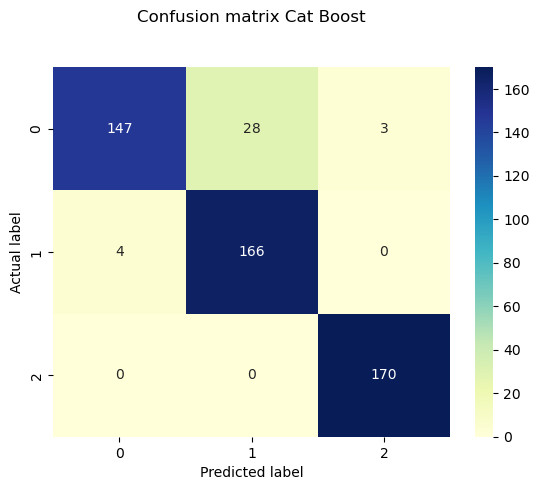

In [95]:
ypred = cat.predict(x_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix Cat Boost', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [96]:
pd.DataFrame(cat.feature_importances_,
             index=x_train.columns, columns=['Importance']).sort_values(
    by='Importance', ascending=False)[:10]

,Importance
roiY,18.208568
roiWidth,18.031580
examId,16.089227
roiX,15.608439
roiHeight,12.561917
roiZ,10.209265
roiDepth,9.291004


In [97]:
lgbm = LGBMClassifier( n_estimators=200, num_leaves=65,learning_rate=0.2, max_depth=-1, n_jobs=5)
#lgbm = LGBMClassifier()
lgbm.fit(x_train,y_train)

LGBMClassifier(learning_rate=0.2, n_estimators=200, n_jobs=5, num_leaves=65)

In [98]:
#print("Features Importance...")
#gain = lgbm.feature_importance('gain')
#featureimp = pd.DataFrame({'feature':lgbm.feature_name(), 
 #                  'split':lgbm.feature_importance('split'), 
  #                 'gain':100 * gain / gain.sum()}).sort_values('gain', ascending=False)
#print(featureimp[:50])


In [99]:
y_pred=lgbm.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",etc.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.98      0.82      0.89       178
           1       0.87      0.98      0.92       170
           2       0.97      1.00      0.98       170

    accuracy                           0.93       518
   macro avg       0.94      0.93      0.93       518
weighted avg       0.94      0.93      0.93       518

Confusion Matrix:
 [[146  26   6]
 [  3 167   0]
 [  0   0 170]]
Training Score:
 100.0
Mean Squared Error:
 0.10231660231660232
R2 score is:
 0.8476470588235294


In [100]:
lgmacc=(accuracy_score(y_test,y_pred)*100)
print(lgmacc)

93.24324324324324


Text(0.5, 23.52222222222222, 'Predicted label')

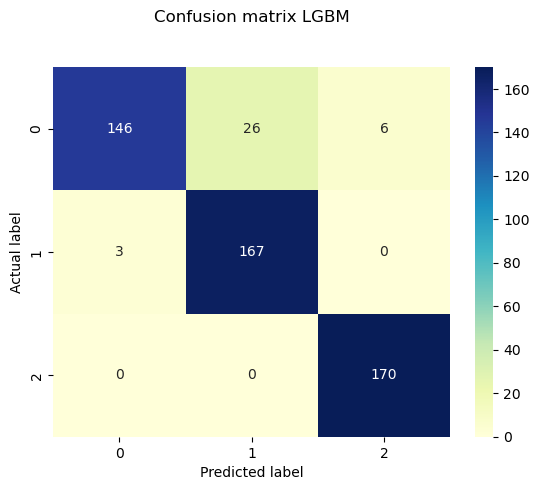

In [101]:
ypred = lgbm.predict(x_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix LGBM', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [102]:
pd.DataFrame(lgbm.feature_importances_,
             index=x_train.columns, columns=['Importance']).sort_values(
    by='Importance', ascending=False)[:10]

,Importance
examId,4985
roiY,4007
roiX,3504
roiWidth,3457
roiHeight,3291
roiZ,1202
roiDepth,682


In [103]:
classifiers = [('LogisticRegression', reg), ('KNeighborsClassifier', knn),('SVC', svc), ('GaussianNB', gnb), ('DecisionTreeClassifier', dtree), ('RandomForestClassifier', rfc), ('AdaBoostClassifier', adb) , ('GradientBoostingClassifier', gbc), ('XGBClassifier', xgb), ('ExtraTreesClassifier', etc), ('CatBoostClassifier', cat),('LGBMClassifier',lgbm)] 

In [104]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data


,Actual,Predicted
854,1,1
12,1,1
261,0,0
803,1,1
399,0,0
...,...,...
202,2,2
785,1,1
695,2,2
639,0,0


In [105]:
d = {'Model': ['Logistic Regression', 'KNeighbors Classifier', "SVC", "Naiye Bayes", 'Decision Tree Classifier', 'Random Forest Classifier', 'Ada Boost Classifier', 'Gradient Boosting Classifier',"XGB Classifier","Extra Trees Classifier","Cat Boost Classifier","LGBMClassifier"],
     'accuracy' : [LRacc,knnacc,svcacc,gnbacc,dtacc,rfacc,adabacc,gbcacc,xbgacc,etcacc,catacc,lgmacc]}


result_df = pd.DataFrame(data = d,)
result_df.sort_values(by = 'accuracy', ascending = False)

,Model,accuracy
9,Extra Trees Classifier,96.911197
5,Random Forest Classifier,95.559846
8,XGB Classifier,93.629344
10,Cat Boost Classifier,93.243243
11,LGBMClassifier,93.243243
7,Gradient Boosting Classifier,82.625483
1,KNeighbors Classifier,75.096525
4,Decision Tree Classifier,75.096525
6,Ada Boost Classifier,57.915058
3,Naiye Bayes,42.084942


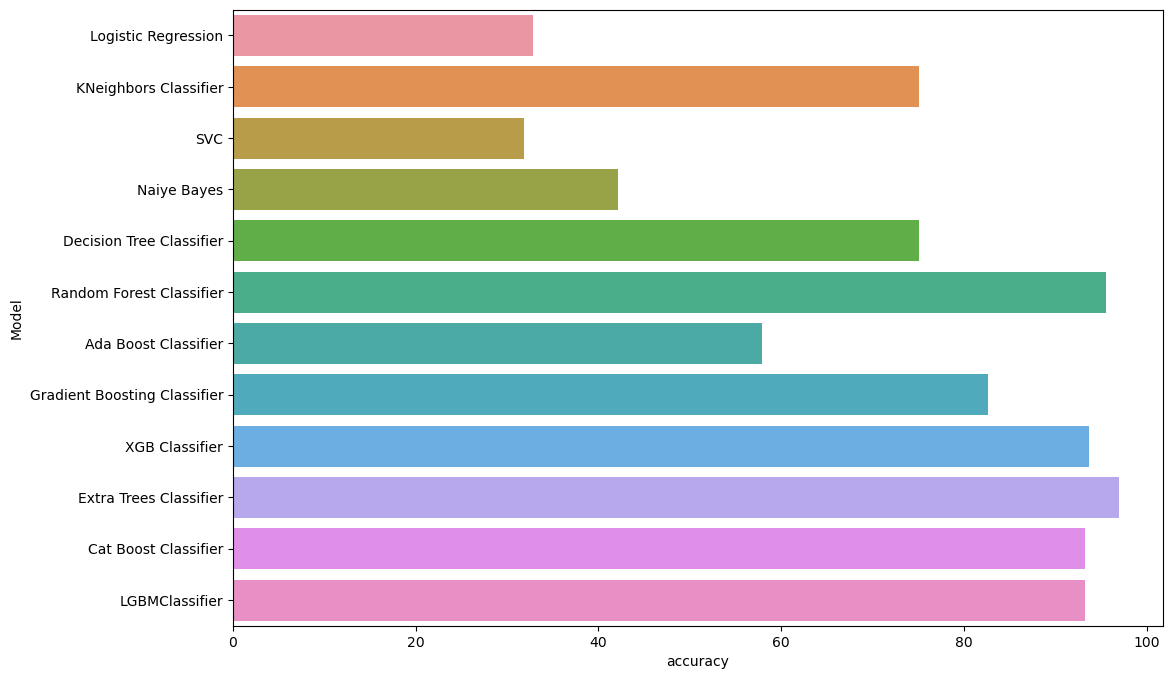

In [106]:
plt.figure(figsize = (12, 8))

sns.barplot(x = 'accuracy' ,y= 'Model', data = result_df)
plt.show()